<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Togonon, Nash Edrian A.<br>
    201914796 <br>
   58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd

file_prices = '/content/bebang prices.csv'
file_sales = '/content/bebang sales.csv'

df_prices = pd.read_csv(file_prices, index_col=0) 
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices
df_prices.T

,price per piece,cost per piece
red velvet,35,25
oreo,25,15
sugar glazed,20,10
almond honey,35,20
matcha,50,35
strawberry cream,40,31
brown sugar boba,40,30
furits and nuts,45,25
dark chocolate,30,15
chocolate and orange,40,25


In [ ]:
## Let's check the sales dataframe
df_sales


,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [25]:
import numpy as np
### Vectorizing the data

prices_matrix = np.array(df_prices)[:1] 
costs_matrix = np.array(df_prices)[1:]
sales_mat = np.array(df_sales.set_index('flavor'))
p_matrix = prices_matrix.T
c_matrix = costs_matrix.T


## Do not alter these lines
print(sales_mat.shape)
print(p_matrix.shape)
print(c_matrix.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 13)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [24]:

#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales * price
    monthly_costs = sales * cost
    monthly_profits = monthly_revenue - monthly_costs

    mprofits = monthly_profits.T
    profitmonth = mprofits.sum(axis = 1)

    df_mprofit = pd.DataFrame(profitmonth)
    df_mprofit.columns = ["Monthly Profits"]
    df_mprofit.index = ['January','February',
                       'March','April','May',
                       'June','July','August',
                       'September','October',
                       'November','December']

    print(df_mprofit)
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [23]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(p_matrix, c_matrix, sales_mat)
print("\nRevenue:\n",month_rev,"\nCost:\n", month_cost,"\nProfit:\n" ,month_profit)


           Monthly Profits
January              79371
February             59208
March                53850
April                10001
May                  52824
June                  5527
July                  5598
August                5498
September             5034
October               7213
November             76548
December            117156

Revenue:
 [ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   8400  14880  14760   3120   6520   1040   1800    880   2160   1640
   8280  18240  39240  15200   6160    560   5880    600   3920   1320
    920   1440  22080  25320  21510  20790  15930   2205   4005      0

## Part 2: Flavor Sales

In [22]:
# #Create a function that *returns* and prints the flavor profits for the whole year 

flavors = []
def flavor_sales(price, cost, sales):
    flavor_revenue = sales * price
    flavor_costs = sales * cost
    flavor_profits = flavor_revenue - flavor_costs 
  

    Red_velvet = flavor_profits[0].sum()
    Oreo = sum(flavor_profits[1])
    Sugar_glazed = sum(flavor_profits[2])
    Almond_Honey = sum(flavor_profits[3])
    matcha = sum(flavor_profits[4]) 
    strawberry_cream = sum(flavor_profits[5])
    brown_sugar_boba = sum(flavor_profits[6])
    fruits_and_nuts = sum(flavor_profits[7])
    dark_chocolate = sum(flavor_profits[8])
    chocolate_and_orange = sum(flavor_profits[9])
    choco_mint = sum(flavor_profits[10])
    choco_butter_naught = sum(flavor_profits[11])
    
    flavors.append(Red_velvet)
    flavors.append(Oreo)
    flavors.append(Sugar_glazed)
    flavors.append(Almond_Honey)
    flavors.append(matcha)
    flavors.append(strawberry_cream)
    flavors.append(brown_sugar_boba)
    flavors.append(fruits_and_nuts)
    flavors.append(dark_chocolate)
    flavors.append(chocolate_and_orange)
    flavors.append(choco_mint)
    flavors.append(choco_butter_naught)


    df_flavors = pd.DataFrame(flavors)
    df_flavors.columns = ["Yearly Income"]
    df_flavors.index = ["red velvet","Oreo",
                        "Sugar glazed0","Almond Honey",
                        "matcha","strawberry cream","brown sugar boba",
                        "fruits and nuts","dark chocolate","chocolate and orange",
                        "choco mint","choco butter naught"]

    print(df_flavors)
    return flavor_profits.flatten()



In [21]:
### Do not alter this cell
flavor_profit = flavor_sales(p_matrix, c_matrix, sales_mat)
### print the values

                      Yearly Income
red velvet                    41370
Oreo                          19040
Sugar glazed0                 53260
Almond Honey                  23715
matcha                        61245
strawberry cream              18387
brown sugar boba              30660
fruits and nuts               39820
dark chocolate                44790
chocolate and orange          27615
choco mint                    26156
choco butter naught           91770


In [20]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
df_sales["sum"] = df_sales.sum(axis = 1)
df_sales.sort_values("sum",axis = 0 ,ascending = True, inplace = True, na_position ='first')
print(df_sales)
best_3_flavors = [("first:" ,df_sales.iloc[11]['flavor']),("second:",df_sales.iloc[10]['flavor']),("third:",df_sales.iloc[9]['flavor'])]
print("The best flavors: " ,best_3_flavors)
worst_3_flavors = [("first:" ,df_sales.iloc[1]['flavor']),("second:",df_sales.iloc[2]['flavor']),("third:",df_sales.iloc[3]['flavor'])]
print("The worst flavors : ", worst_3_flavors)


                  flavor  january  february  ...  november  december   sum
3           almond honey      124       112  ...       300       566  1581
9   chocolate and orange      324       123  ...       632       231  1841
1                   oreo      210       324  ...       312       548  1904
7        furits and nuts      478       462  ...       335       214  1991
10            choco mint      458       412  ...       323       564  2012
5       strawberry cream      210       372  ...       207       456  2043
8         dark chocolate      598       203  ...       789       458  2986
6       brown sugar boba      981       380  ...       552       633  3066
4                 matcha      645       498  ...       549       897  4083
0             red velvet      781       524  ...       231       899  4137
2           sugar glazed      599       674  ...       781      1602  5326
11   choco butter naught      778       586  ...       784      2310  6555

[12 rows x 14 columns]
T

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


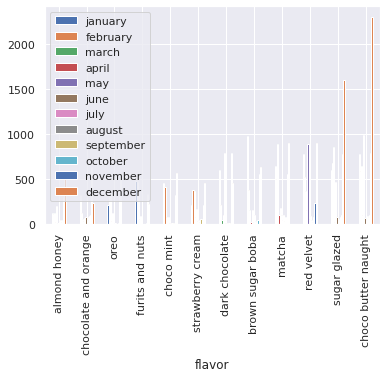

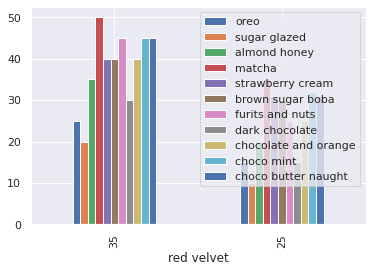

In [ ]:

print(df_sales.plot('flavor',[1,2,3,4,5,6,7,8,9,10,11,12],kind = 'bar'))
print(df_prices.plot('red velvet',[1,2,3,4,5,6,7,8,9,10,11],kind = 'bar'))

#### Monthly Sales

#### Flavor Sales

AxesSubplot(0.125,0.125;0.775x0.755)


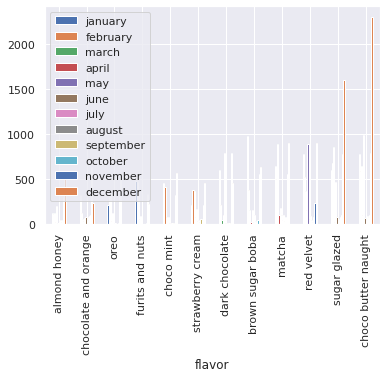

In [ ]:
print(df_sales.plot('flavor',[1,2,3,4,5,6,7,8,9,10,11,12],kind = 'bar'))

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations



```
# This is formatted as code
```
Choco, sugar-plated and red velvet have the three best-sold aromas, while chocolate, orange, oreo, and fruit and nuts are also the least sold. Between the month of June and November, the income in the store slowed down as the profit increased between December and March. I suggest that Aling bebang should be expected to increase small percentage of profit and promotions during the months that are ineffective to the earnings which might sell the least purchase different flavours.